<h1 style="color:Blue;" align="center"> LDA sobre los tweets del 07/09/2018 #JustDoIt </h1>

<h3 style = 'color:blue' > Notación </h3>

### Palabras o Términos

La palabra es la unidad mínima de información en el trabajo con lenguaje natural.

Desde una perspectiva muy moderna las palabras son objetos que puede pensarse como puntos que están en un espacio de alta dimensión, de tal manera que, puntos cercanos en algún sentido de distancia corresponde a palabras que tienen una cercanía dentro de un universo de palabras considerado.

La siguiente imagen corresponde a uno conjunto de palabras de astrofísica, consideradas en un estudio de resumenes de artículos científicos. Este es un gráfico obtenido luego de un procesamiento como lo que mostramos hoy, desarrollado por Montenegro y Montenegro usando una técnica de análisis basada en la teoría de respuesta al ítem multidimensional (TRIM).

en este documetnos las palabras de denotarán como  $w_i, i = 1,2,\cdots,K$

### Documentos 

Los documentos son los sujetos en los análisis textual superficial. Suponemos que se tiene un conjunto de documentos individuales, cada uno de los cuales se denotará por $w$. Se considera que un documento es una sucesión de $N$ palabras. Así se tiene que un documento se denota como $w=\{w_1,…,w_N\}$.

### Corpus

Un corpus es una colección de documentos en un problema particular.

### Tópicos

Los tópicos son áreas latentes a las cuales están asociados tanto las palabras como los documentos. Uno de los propósitos principales del análisis de textos es descubrir o poner en evidencia tales tópicos.

La figura anterior muestra por ejemplo la presencia de 10 tópicos en el conjunto de documentos de astrofísica analizados.


<h3 style = 'color:blue' > Preprocesamiento de datos textuales </h3>

En lo que sigue, vamos a utilizar los términos token y tokenizar, que aún no son adoptados por la Real Academia de la Lengua, pero que creemos pronto lo serán como tantos otros provenientes del inglés debido a su enorme utilización actual, por razón de los desarrollos científicos y tecnológicos.

Realizaremos los siguientes pasos:

* **Tokenización:** divide el texto en oraciones y las oraciones en palabras. Ponga las palabras en minúsculas y elimine la puntuación.
* Se **eliminan las palabras que tienen menos de 3 caracteres.**
* Se eliminan todas las **palabras vacías.**
* Las palabras se **lematizan:** las palabras en tercera persona se cambian a primera persona y los verbos en tiempo pasado y futuro se cambian a presente.
* Las palabras se recortan (**stemming**): las palabras se reducen a su forma raíz.

Usaremos las librerías *gensim* y *nltk* para hacer este trabajo.

### Tokenización

Algunos términos que se utilizarán con frecuencia son:

* Corpus: cuerpo del texto, singular. Corpora es el plural de corpus.
* Léxico: palabras y sus significados.
* Token: cada entidad que es parte de lo que sea que se dividió según las reglas que establecemos apara el análisis. Por ejemplo, cada palabra es un token cuando una oración se tokeniza en palabras. Cada oración también puede ser un token, si ha convertido las oraciones en un párrafo.

Básicamente, tokenizar implica dividir oraciones y palabras del cuerpo del texto.

Veá el siguiente ejemplo tomado de   [Geek for Geeks](https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/?ref=rp). Usamos la librería *nltk*.

### Lematización
La lematización es el proceso de agrupar las diferentes formas flexionadas de una palabra para que puedan analizarse como un solo elemento. La lematización es similar a la derivación, pero aporta contexto a las palabras. Por lo tanto, vincula palabras con un significado similar a una palabra.

El preprocesamiento de texto incluye tanto *Stemming* como _Lemmatization_.

Muchas veces las personas encuentran confusos estos dos términos. Algunos tratan a estos dos como iguales.

**En realidad, se prefiere la lematización a la derivación porque la lematización realiza un análisis morfológico de las palabras.**

Las aplicaciones de la lematización son:

* Se utiliza en sistemas de recuperación integrales como motores de búsqueda.
* Utilizado en indexación compacta
* Ejemplos de lematización:

* rocas -> roca

* corpora -> corpus
* mejor -> bueno

Una diferencia importante con la derivación es que lematizar toma una parte del parámetro de voz, "pos". Si no se proporciona, el valor predeterminado es "sustantivo". En el siguiente ejemplo vamos colocar pos='a' que significa adjetivo. Si se coloca pos ='v' significa verbo. Por defecto es pos ='n', es decir sustantivo.

A continuación se muestra la implementación de lematización de algunas palabras en inglés usando la librería *nltk*:

### Steeming
La derivación (steeming) es el proceso de producir variantes morfológicas de una palabra raíz / base. Los programas de derivación se conocen comúnmente como algoritmos de steeming o derivaciones. Un algoritmo de stemming reduce las palabras como en los siguientes ejemplos

* "chocolates", "chocolates", "choco" a la raíz de la palabra, "chocolate"
* "recuperación", "recuperado", "recupera" se reduce a la raíz "recuperar".


In [1]:
import pandas as pd 
import numpy as np
import os 
os.chdir('C:/Users/David.solano/Documents/David/Big Data y Ciencia de Datos/Just Do It - NIKE/BASES')

### Lectura de los datos

In [2]:
df = pd.read_csv('justdoit_tweets_2018_09_07.csv', delimiter=',')
df.dataframeName = 'justdoit_tweets_2018_09_07.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1019 rows and 73 columns


In [3]:
df.head()

,tweet_created_at,tweet_id,tweet_id_str,tweet_full_text,tweet_truncated,tweet_display_text_range,tweet_entities,tweet_metadata,tweet_source,tweet_in_reply_to_status_id,...,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries
0,Sun May 16 02:01:38 +0000 2021,1393748443294797824,1393748443294797824,"Good Sunday, today we are totally self reliant...",False,"[0, 243]","{'hashtags': [{'text': 'OUT', 'indices': [136,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,333333,True,False,False,False,False,False,False,none,[]
1,Sun May 16 01:59:52 +0000 2021,1393747998409072642,1393747998409072642,@cz_binance @binance\n how do you think? It's ...,False,"[0, 106]","{'hashtags': [{'text': 'justdoit', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,333333,True,False,True,True,False,False,False,none,[]
2,Sun May 16 01:59:42 +0000 2021,1393747958248574976,1393747958248574976,@cz_binance @binance\n how do you think? It's ...,False,"[0, 106]","{'hashtags': [{'text': 'justdoit', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,333333,True,False,True,False,False,False,False,none,[]
3,Sun May 16 01:59:32 +0000 2021,1393747914975891460,1393747914975891460,@cz_binance @binance\n how do you think? It's ...,False,"[0, 106]","{'hashtags': [{'text': 'justdoit', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,333333,True,False,True,False,False,False,False,none,[]
4,Sun May 16 01:59:21 +0000 2021,1393747869761294336,1393747869761294336,@cz_binance @binance\n how do you think? It's ...,False,"[0, 106]","{'hashtags': [{'text': 'justdoit', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,333333,True,True,True,False,False,False,False,none,[]


In [10]:
text = df.tweet_full_text
text = pd.DataFrame(text)
documents = text
documents.head()

,tweet_full_text
0,"Good Sunday, today we are totally self reliant..."
1,@cz_binance @binance\n how do you think? It's ...
2,@cz_binance @binance\n how do you think? It's ...
3,@cz_binance @binance\n how do you think? It's ...
4,@cz_binance @binance\n how do you think? It's ...


In [11]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
documents['tweet_full_text'] = documents['tweet_full_text'].map(tknzr.tokenize)

def phrase(lista):
    frase = ' '.join(lista)
    return(frase)

documents['tweet_full_text'] = documents['tweet_full_text'].map(phrase)

In [6]:
documents['tweet_full_text']

0       Good Sunday , today we are totally self relian...
1       how do you think ? It's not time yet to list $...
2       how do you think ? It's not time yet to list $...
3       how do you think ? It's not time yet to list $...
4       how do you think ? It's not time yet to list $...
                              ...                        
1014    It is a good day to be a Boss . #justdoit #Sat...
1015    #JustDoIt till you can , falling is the practi...
1016    Current mood ! ... if this is your current moo...
1017    PEOPLE NEED MIDNIGHT GOSPEL #needseason2 #just...
1018    has always been spot on with their #community ...
Name: tweet_full_text, Length: 1019, dtype: object

### Librerías para el análisis de texto

In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import nltk
import stanza
from nltk.corpus import stopwords
import re, unicodedata

from rpy2.robjects import r
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

np.random.seed(2018)
import nltk
nltk.download('wordnet')

utils = importr('utils')
stanza.download('en')
nlp = stanza.Pipeline('en')

stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\David.solano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2021-05-19 14:40:36 INFO: Downloading default packages for language: en (English)...
2021-05-19 14:40:38 INFO: File exists: C:\Users\David.solano\stanza_resources\en\default.zip.
2021-05-19 14:40:48 INFO: Finished downloading models and saved to C:\Users\David.solano\stanza_resources.
2021-05-19 14:40:48 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-05-19 14:40:48 INFO: Use device: cpu
2021-05-19 14:40:48 INFO: Loading: tokenize
2021-05-19 14:40:48 INFO: Loading: pos
2021-05-19 14:40:49 INFO: Loading: lemma
2021-05-19 14:40:49 INFO: Loading: depparse
2021-05-19 14:40:50 INFO: Loading: sentiment
2021-05-19 1

### Funciones de Pre Procesamiento

### Stop Words 

In [19]:
stop_words = list(gensim.parsing.preprocessing.STOPWORDS)
stop_words.extend(['justdoit','http','hashtag','nike'])
stop_words.extend(stopwords.words('english'))
stop_words = set(stop_words)

In [43]:
def lemmatize_stemming(text):
    doc = nlp(text)
    output = doc.sentences[0].words[0].lemma
    return(output)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text,min_len = 4):
        if token not in stop_words:
            result.append(lemmatize_stemming(token))
    return result

#### Pre procesamiento de los datos

In [44]:
processed_docs = documents['tweet_full_text'].map(preprocess)

print(processed_docs.tail())

1014                                         [good, boss]
1015    [till, falling, practice, need, know, missing,...
1016    [current, mood, current, mood, finally, go, ad...
1017         [people, need, midnight, gospel, needseason]
1018    [spot, community, hashtag, create, brand, asso...
Name: tweet_full_text, dtype: object


### Palabras más frecuentes

In [45]:
from itertools import chain
from prettytable import PrettyTable
from collections import Counter

words = list(chain.from_iterable(processed_docs))
pt = PrettyTable(field_names=['Palabra', 'Conteo']) 

c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:14] ]
pt.align['Palabra'], pt.align['Conteo'] = 'l', 'r' 
pt._max_width = {'Palabra':60, 'Conteo':10}
print(pt)

+------------+--------+
| Palabra    | Conteo |
+------------+--------+
| http       |    769 |
| life       |    100 |
| motivation |     88 |
| time       |     81 |
| start      |     73 |
| today      |     66 |
| running    |     63 |
| club       |     60 |
| think      |     52 |
| mile       |     52 |
| need       |     51 |
| good       |     45 |
| know       |     44 |
| love       |     42 |
+------------+--------+


### Nube de Palabras

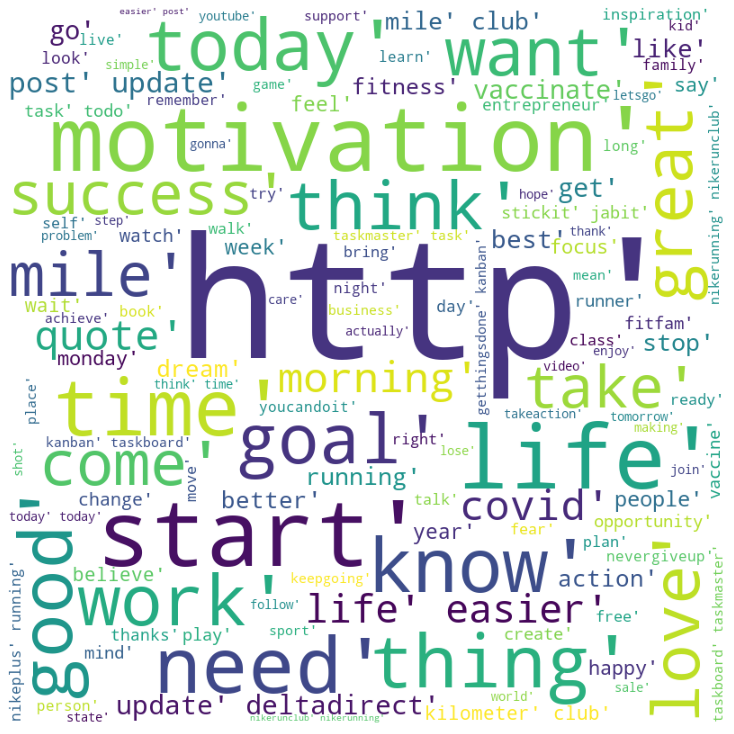

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(words))
                    
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

#### Construcción del diccionario de palabras y Bow_Corpus

In [47]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

# Se filtran casos extremos
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

0 adventuretime
1 diving
2 freedom
3 good
4 know
5 lovingit
6 padi
7 reliant
8 self
9 solo
10 sunday


<h3 style = 'color:blue' > TF-IDF </h3>


Tf-idf (del inglés Term frequency – Inverse document frequency), frecuencia de término – frecuencia inversa de documento (o sea, la frecuencia de ocurrencia del término en el corpus de documentos), es una medida numérica que expresa cuán relevante es una palabra para un documento en un corpus. Esta medida se utiliza a menudo como un factor de **ponderación en la recuperación de información y la minería de textos.**

El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en el corpus de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

Variaciones del esquema de peso tf-idf son empleadas frecuentemente por los motores de búsqueda como herramienta fundamental para medir la relevancia de un documento dada una consulta del usuario, estableciendo así una ordenación o ranking de los mismos.

Tf-idf puede utilizarse exitosamente para el filtrado de las palabras vacías (stop-words), en diferentes campos del pre-procesamiento de textos.

### Detalles matemáticos
Tf-idf es el producto de dos medidas, frecuencia de término y frecuencia inversa de documento. Existen varias maneras de determinar el valor de ambas.

En el caso de la frecuencia de término $tf(t,d)$, la opción más sencilla es usar la frecuencia bruta del término t en el documento d, o sea, el número de veces que el término $t$ ocurre en el documento $d$. Si denotamos la frecuencia bruta de $t$ por $f(t,d)$, entonces el esquema tf simple es $tf(t,d)=f(t,d).$

Otras posibilidades son:

* frecuencias" booleanas: $tf(t,d) = 1$ si t ocurre en d, y 0 si no;
* frecuencia escalada logarítmicamente: $tf(t,d) = 1 + log(1 + f(t,d))$ (y 0 si f(t,d)=0);
* frecuencia normalizada, para evitar una predisposición hacia los documentos largos. Por ejemplo, se divide la frecuencia bruta por la frecuencia máxima de algún término en el documento:

$$ tf(t,D) = \dfrac{f(t,d)}{max\{f(t,D): t \in d \}} $$ 


La frecuencia inversa de documento es una medida de si el término es común o no, en el corpus de documentos. Se obtiene dividiendo el número total de documentos por el número de documentos que contienen el término, y se toma el logaritmo de ese cociente:

$$ idf(t,D) = log \dfrac{\mid D \mid}{\mid \{ d \in D: t \in d \} \mid} $$ 

donde 

* $\mid D \mid$: cardinalidad de $D$, o número de documentos en el corpus.
* $\mid \{ d \in D: t \in d \} \mid$: número de documentos donde aparece el término t. Si el término no está en la colección se producirá una división-por-cero. Por lo tanto, es común ajustar esta fórmula a $1 + \mid \{ d \in D: t \in d \} \mid$

Matemáticamente, la base de la función logaritmo no es importante y constituye un factor constante en el resultado final.

Luego, tf-idf se calcula como:

$$  tfidf(t,d,D) = tf(t,f)  *  idf(t,D) $$

Un peso alto en tf-idf se alcanza con una elevada frecuencia de término (en el documento dado) y una pequeña frecuencia de ocurrencia del término en corpus de documentos.

Como el cociente dentro de la función logaritmo del idf es siempre mayor o igual que 1, el valor del idf (y del tf-idf) es mayor o igual que 0.

Cuando un término aparece en muchos documentos, el cociente dentro del logaritmo se acerca a 1, ofreciendo un valor de idf y de tf-idf cercano a 0.

<h3 style ='color:blue'> Modelos Generativos </h3>

La técnica Latent Dirichlet Allocation (LDA) es la más utilizada actualmente para la extracción de toṕicos de corpus de documentos y se debe a Blei et al.

## Las ideas centrales detrás de LDA, Blei et al.(2003)
Las ideas centrales detrás de LDA son las siguientes. El modelo generativo supone que los documentos son generados como sigue:

1. El tamaño N del documento es generado por una distribución de Poisson Poi(ξ).
2. Los tópicos son generados a partir de una distribución multinomial con vector de probabilidades θ.
3. A priori se asume que que el vector θ es generado por una distribución de Dirichlet con vector de parámetros α. De aquí deriva el nombre de la técnica.
4. Cada una de las N palabras en un documentos es generada según el siguiente algoritmo.
  * Se escoge un tópico $z_n∼ Multinomial(θ)$.
  * Se escoge la palabra $w_ n ∼P(w_n|z_n,β)$. En donde $β$ es una matriz de probabilidades de pertenencia de las palabras a los tópicos. $P$ es una probabilidad multinomial condicionada al tópico $z_n$ y al vector de parámetros $β$.
  
Al lector interesado en los detalles, lo remitimos al paper original de [Blei et al.](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

El modelado de temas (topic modeling) es un tipo de modelado estadístico para descubrir los “temas” abstractos que ocurren en una colección de documentos. La asignación de Dirichlet latente (LDA) es un ejemplo de modelo de tema y se utiliza para clasificar el texto de un documento en un tema en particular.

Construye un modelo de tema por documento y palabras por modelo de tema, modelado como distribuciones de Dirichlet.

### Matriz TF-IDF

In [48]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3008563637776898),
 (1, 0.3076173839165559),
 (2, 0.8384769070304341),
 (3, 0.3343852117894532)]


<h3 style="color:Blue;" > LDA </h3>

### Con bolsa de palabras

In [49]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, 
                                       passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.056*"motivation" + 0.051*"start" + 0.031*"vaccinate" + 0.031*"great" + 0.028*"covid" + 0.027*"vaccine" + 0.024*"take" + 0.023*"kanban" + 0.023*"task" + 0.023*"success"
Topic: 1 
Words: 0.058*"today" + 0.048*"good" + 0.047*"need" + 0.040*"mile" + 0.038*"know" + 0.037*"love" + 0.033*"motivation" + 0.027*"fitness" + 0.025*"goal" + 0.023*"time"
Topic: 2 
Words: 0.086*"life" + 0.053*"like" + 0.049*"update" + 0.045*"post" + 0.045*"easier" + 0.044*"play" + 0.043*"game" + 0.043*"deltadirect" + 0.034*"quote" + 0.028*"motivation"
Topic: 3 
Words: 0.059*"running" + 0.053*"nikerunning" + 0.046*"time" + 0.036*"work" + 0.035*"nikerunclub" + 0.032*"nikeplus" + 0.028*"workout" + 0.027*"thing" + 0.026*"club" + 0.026*"morning"
Topic: 4 
Words: 0.083*"think" + 0.061*"life" + 0.051*"come" + 0.043*"time" + 0.042*"club" + 0.030*"year" + 0.029*"kilometer" + 0.027*"people" + 0.024*"best" + 0.024*"thing"


### Con matrix TF-IDF 

In [50]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5,
                                             id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.070*"time" + 0.065*"club" + 0.060*"mile" + 0.032*"think" + 0.031*"kilometer" + 0.028*"life" + 0.023*"thing" + 0.022*"play" + 0.021*"family" + 0.020*"list"
Topic: 1 Word: 0.061*"love" + 0.052*"need" + 0.041*"life" + 0.029*"come" + 0.025*"like" + 0.024*"mind" + 0.023*"look" + 0.023*"happy" + 0.022*"fitfam" + 0.022*"watch"
Topic: 2 Word: 0.039*"running" + 0.037*"post" + 0.036*"work" + 0.036*"life" + 0.035*"update" + 0.034*"deltadirect" + 0.034*"easier" + 0.031*"nikeplus" + 0.030*"dream" + 0.029*"start"
Topic: 3 Word: 0.059*"know" + 0.045*"motivation" + 0.032*"want" + 0.030*"nikerunning" + 0.024*"right" + 0.023*"success" + 0.023*"opportunity" + 0.022*"day" + 0.021*"fitness" + 0.021*"say"
Topic: 4 Word: 0.048*"today" + 0.043*"great" + 0.040*"morning" + 0.034*"thing" + 0.033*"good" + 0.033*"better" + 0.027*"feel" + 0.025*"start" + 0.024*"week" + 0.022*"help"


### Representación de un documento 

In [56]:
processed_docs[1000]

['sunny',
 'morning',
 'running',
 'pegasus',
 'garmin',
 'forerunner',
 'coloniaguell',
 'santacoloma',
 'santboi',
 'runfree',
 'runismytherapy',
 'justrun',
 'rcpremix',
 'rundancer',
 'kmsxela',
 'http',
 'cvvnw']

In [58]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7271168231964111	 
Topic: 0.083*"think" + 0.061*"life" + 0.051*"come" + 0.043*"time" + 0.042*"club" + 0.030*"year" + 0.029*"kilometer" + 0.027*"people" + 0.024*"best" + 0.024*"thing"

Score: 0.07078509777784348	 
Topic: 0.086*"life" + 0.053*"like" + 0.049*"update" + 0.045*"post" + 0.045*"easier" + 0.044*"play" + 0.043*"game" + 0.043*"deltadirect" + 0.034*"quote" + 0.028*"motivation"

Score: 0.06829032301902771	 
Topic: 0.059*"running" + 0.053*"nikerunning" + 0.046*"time" + 0.036*"work" + 0.035*"nikerunclub" + 0.032*"nikeplus" + 0.028*"workout" + 0.027*"thing" + 0.026*"club" + 0.026*"morning"

Score: 0.06704512238502502	 
Topic: 0.056*"motivation" + 0.051*"start" + 0.031*"vaccinate" + 0.031*"great" + 0.028*"covid" + 0.027*"vaccine" + 0.024*"take" + 0.023*"kanban" + 0.023*"task" + 0.023*"success"

Score: 0.06676269322633743	 
Topic: 0.058*"today" + 0.048*"good" + 0.047*"need" + 0.040*"mile" + 0.038*"know" + 0.037*"love" + 0.033*"motivation" + 0.027*"fitness" + 0.025*"goal" + 0.